<a href="https://colab.research.google.com/github/emilytsen/sgdc_music/blob/main/sgdc_music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de musicas definindo quem é o cantor.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#classificador
from sklearn.linear_model import SGDClassifier
#seleção de dados de treino e teste
from sklearn.model_selection import train_test_split
#exibir métricas
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#vetorizar texto
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df = pd.read_csv('/content/musicas.csv')
df

,cantorId,cantorNome,musicaNome,letra
0,0,david-bowie,Heroes,"I, I will be king. And you, you will be queen...."
1,0,david-bowie,Starman,"Didn't know what time it was,. The lights were..."
2,0,david-bowie,Space Oddity,Ground control to Major Tom. Ground control to...
3,0,david-bowie,Life On Mars?,It's a god-awful small affair. To the girl wit...
4,0,david-bowie,Modern Love,I know when to go out. And when to stay in. Ge...
...,...,...,...,...
1743,4,ac-dc,Who Made Who,The video game says Play me. Face it on a leve...
1744,4,ac-dc,Whole Lotta Rosie,Wanna tell you a story. 'Bout a woman I know. ...
1745,4,ac-dc,You Ain't Got A Hold On Me,You can roll me round your finger. You can rol...
1746,4,ac-dc,You Shook Me All Night Long,She was a fast machine. She kept the motor cle...


In [ ]:
df.sample(5)

,cantorId,cantorNome,musicaNome,letra
951,2,laura-pausini,Se Fué,Ya no responde ni al teléfono. Pende de un hil...
198,0,david-bowie,I'm Afraid Of Americans,"Johnny's in America, low-tech's at the wheel. ..."
1614,4,ac-dc,For Those About to Rock (We Salute You),We roll tonight [We're on tonight]. To the gui...
1175,2,laura-pausini,La Solución (Feat. Carlos Rivera),"Eras tú, entre toda aquella gente. Eras tú, co..."
157,0,david-bowie,Golden Years,"Golden years, gold whop whop whop. Golden year..."


In [ ]:
# configurando as variaveia
x = df['letra']
y = df['cantorId']
nomes = df['cantorNome'].unique()

x

,letra
0,"I, I will be king. And you, you will be queen...."
1,"Didn't know what time it was,. The lights were..."
2,Ground control to Major Tom. Ground control to...
3,It's a god-awful small affair. To the girl wit...
4,I know when to go out. And when to stay in. Ge...
...,...
1743,The video game says Play me. Face it on a leve...
1744,Wanna tell you a story. 'Bout a woman I know. ...
1745,You can roll me round your finger. You can rol...
1746,She was a fast machine. She kept the motor cle...


In [ ]:
y

,cantorId
0,0
1,0
2,0
3,0
4,0
...,...
1743,4
1744,4
1745,4
1746,4


In [ ]:
#transformar linhas para minusculo
palavras = x.str.lower().str.split()
palavras

,letra
0,"[i,, i, will, be, king., and, you,, you, will,..."
1,"[didn't, know, what, time, it, was,., the, lig..."
2,"[ground, control, to, major, tom., ground, con..."
3,"[it's, a, god-awful, small, affair., to, the, ..."
4,"[i, know, when, to, go, out., and, when, to, s..."
...,...
1743,"[the, video, game, says, play, me., face, it, ..."
1744,"[wanna, tell, you, a, story., 'bout, a, woman,..."
1745,"[you, can, roll, me, round, your, finger., you..."
1746,"[she, was, a, fast, machine., she, kept, the, ..."


In [ ]:
#criando um discionário com todas as palavras da variavel x (letras)
discionario = set()
for i in palavras:
  discionario.update(i)
discionario

minhas_palavras = dict(zip(discionario, range(len(discionario))))

print(len(minhas_palavras))

for i in range(0, 10):
  print(list(minhas_palavras.items())[i])

30685
('have', 0)
('encima', 1)
('devine.', 2)
('phrases,.', 3)
('destruyó.', 4)
('rocket.', 5)
('web,.', 6)
("she's", 7)
('resurrected.', 8)
('failing', 9)


In [ ]:
xtreino, xteste, ytreino, yteste = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)


#vetorizado letras para numeros
txtvetorizador = TfidfVectorizer()

vetor_xtreino = txtvetorizador.fit_transform(xtreino)

In [ ]:
# Training the model
modelo = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
modelo.fit(vetor_xtreino, ytreino)

# Vectorizing the test data
vetor_xteste = txtvetorizador.transform(xteste)

In [ ]:
#previsão
previsão = modelo.predict(vetor_xteste)

print(metrics.classification_report(yteste.values, previsão, target_names=nomes))

print(metrics.confusion_matrix(yteste.values, previsão))


                precision    recall  f1-score   support

   david-bowie       0.66      0.71      0.68       140
paul-mccartney       0.68      0.73      0.70       146
 laura-pausini       0.92      0.91      0.92       125
   evanescence       0.92      0.52      0.67        44
         ac-dc       0.83      0.81      0.82        70

      accuracy                           0.76       525
     macro avg       0.80      0.74      0.76       525
  weighted avg       0.77      0.76      0.76       525

[[100  33   0   1   6]
 [ 32 106   2   1   5]
 [  5   6 114   0   0]
 [  8   4   8  23   1]
 [  7   6   0   0  57]]


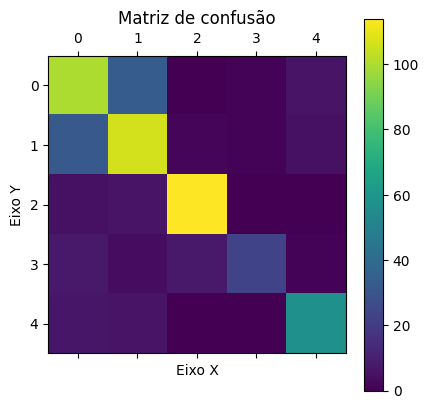

In [ ]:
#fazendo uma matriz de confusão com o matplotlib
matriz = metrics.confusion_matrix(yteste.values, previsão)
plt.matshow(matriz)
plt.title('Matriz de confusão')
plt.colorbar()
plt.ylabel('Eixo Y')
plt.xlabel('Eixo X')
plt.show()